# Análise de Dados

A **Análise de Dados** é um campo de pesquisa muito presente no mundo atual. Isso se da pelo fato do enorme número de dados coletados, os quais podem ser trabalhados a fim de gerar resultados ótimos. De fato, saber trabalhar com estes dados requer conhecimentos acerca de probabilidade, entre outras áreas. Dessa forma, saber definir dados úteis e dados a serem descartados podem acelerar o processo de treinamento do modelo de Machine Learning ao qual deseja-se treinar. Além disso, em inúmeros casos o redimensionamento da quantidade de atributos (features) pode facilitar tal processo, seja através do descarte ou pelo resumo destes.

# **Tratando os Dados**

O **pré-processamento** dos dados é de suma importância para sua análise, uma vez que os dados foram tratados para serem utilizados durante o treinamento do modelo.

## **Redução de Ruído**

### **O que é um ruído no conjunto de dados?**

O **ruído** (no espaço do dados) são itens indesejados no conjunto de dados, características ou amostras que não contribuem para a característica em si, ou a relação entre a característica e a variável alvo.
Ainda assim os ruídos em modelos tabulares podem ser da seguinte forma:

*    Anomalias no conjunto (outliers);
*    Características que não contribuem para a variável alvo (características irrelevantes);
*    Amostras que não seguem o comportamento da maioria dos dados do conjunto;

A imagem abaixo exibe os fatos citados acima:
<center><img src="img/ruidoTabela.png" alt="Drawing" style="width: 550px;height: 220px"/></center>

### **Ruído em um item (Característica ou na variável alvo)**

Tais formas de ruído podem ser interpretadas como sendo valores fora da curva, ou seja, os **outliers**.
<center><img src="img/outlier.png" alt="Drawing" style="width: 350px;height: 220px"/></center>

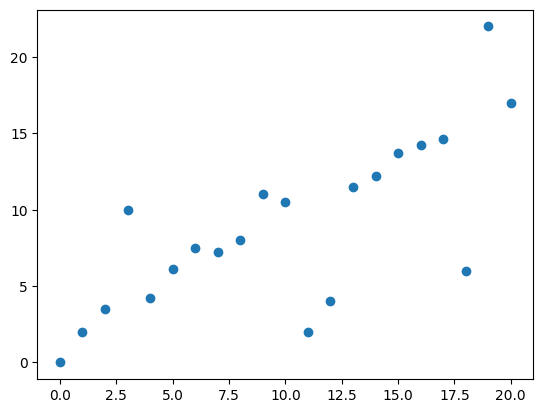

In [81]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
y = np.array([0,2,3.5,10,4.2,6.1,7.5,7.25,8,11,10.5,2,4,11.5, 12.2, 13.7, 14.25, 14.65, 6, 22, 17])

plt.scatter(x, y)
plt.show()

In [82]:
from scipy import stats

# Utilizando a regressão linear para criação do modelo matemático preditivo
slope, intercept, r, p, std_err = stats.linregress(x, y) 

In [83]:
def myfunc(x):
  return slope * x + intercept

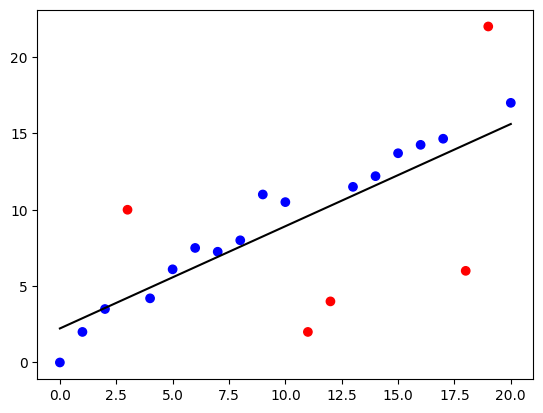

In [84]:
# Mapeando os valores de x e o modelo preditivo
mymodel = list(map(myfunc, x))

# Mínima variação em y
y_var = 3

colors = np.zeros(len(mymodel), dtype=str)

# Number of great points
npoints = 0

# Definindo os outliers na cor vermelha e os pontos relevantes como azul
for i  in range(len(mymodel)):
    if(abs(y[i] - mymodel[i]) > y_var):
        colors[i] = 'red'
    else:
        colors[i] = 'blue'
        npoints = npoints + 1
    
plt.scatter(x, y, c=colors)
plt.plot(x, mymodel, 'k')
plt.show() 

In [85]:
# Verificando a relação entre as variáveis
print(r)

0.7464218246459957


[ 0.  1.  2.  4.  5.  6.  7.  8.  9. 10. 13. 14. 15. 16. 17. 20.  0.  0.
  0.  0.  0.]
[ 0.    2.    3.5   4.2   6.1   7.5   7.25  8.   11.   10.5  11.5  12.2
 13.7  14.25 14.65 17.    0.    0.    0.    0.    0.  ]


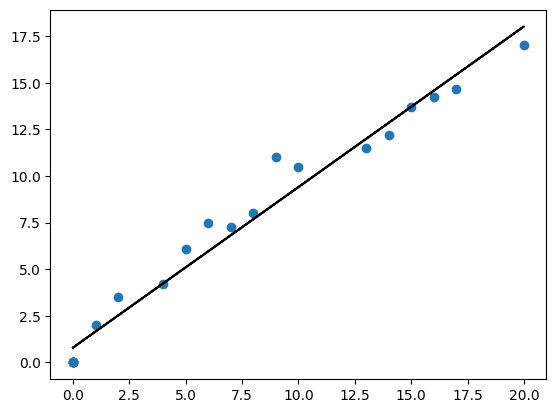

In [86]:
x_new = np.zeros(npoints, dtype = float)
y_new = np.zeros(npoints, dtype = float)

k = 0

for i  in range(len(mymodel)):
    if(abs(y[i] - mymodel[i]) <= y_var):
        y_new[k] = y[i]
        x_new[k] = x[i]
        k = k + 1

print(x_new)
print(y_new)

# Utilizando a regressão linear para recriação do modelo matemático preditivo
slope, intercept, r, p, std_err = stats.linregress(x_new, y_new)

# Mapeando os valores de x e o modelo preditivo
mymodel = list(map(myfunc, x_new))

plt.scatter(x_new, y_new)
plt.plot(x_new, mymodel, 'k')
plt.show() 

In [87]:
# Melhora efetiva na correlação, retirando os outliers
print(r)

0.9863934438730793


### **Ruído como uma característica**

Este tipo de ruído é introduzido quando, baseado em um conjunto de características, algumas não demonstram nenhuma relação com a variável alvo. Dessa forma, realiza-se uma seleção e eliminação das características que não agregam ao resultado final. Métodos de seleção e eliminação de características tratam da seguinte forma:

<center><img src="img/ruidoCaracteristica.png" alt="Drawing" style="width: 550px;height: 55px"/></center>

**Nas seções abaixo, serão apresentadas formas de redução de dimensionalidade, as quais podem ser aplicadas ao conjunto de dados a fim de reduzir a quantidade de features a serem utilizadas para o treinamento do modelo.**

### **Ruído como uma amostra**

**TBD**

## **Normalização vs Padronização**

Em muitos casos, é necessário fazer com que os dados tabalhem em uma mesma faixa de valores. De fato, o dimensionamento dos valores das Features é uma dasetapas de pré-processamento de dados mais importantes no aprendizado de máquina. Algoritmos que levam em consideração a distância entre essas features podem obeter resultados um tanto quanto altos, visto que os dados podem estar em faixas distintas de valores. Dessa forma, o dimensionamento de features ajuda o aprendizado de máquina e os algoritmos de aprendizado profundo a treinar e convergir mais rapidamente.

### **Normalização**

O objetivo da normalização dos dados é converter tal conjunto para uma escala de valores similar, ou seja, tranformá-las em uma mesma ordem de grandeza. Dessa maneira, os dados são convertidos para uma determinada faixa de valores, como: **[0,1]** ou **[-1,1]**. A fórmula mais utilizada para tal é mostrada abaixo, o qual intervalo assumido pela variável **X** será **[0,1]**:

<center>${X}_{changed} = \displaystyle \Bigg[\frac{X - {X}_{min}}{{X}_{max} - {X}_{min}}\Bigg] $</center>

### **Padronização**

O objetivo da padronização é o mesmo da normalização, mas, neste caso, os dados gerados seguem a seguinte regra:

*   Média igual à 0, ou seja, $\overline{X} = 0$;
*   Desvio padrão igual à 1, ou seja, $\sigma = 1$;

Tal método é muito aplicado para variáveis que seguem uma distribuição normal (Gaussiana) ou que apresentam um desvio padrão muito baixo. Seu resultado não possui um valor máximo ou mínimo. A fórmula utilizada para tal é:

<center>${X}_{changed} = \displaystyle \Bigg[\frac{X - \overline{X}}{\sigma}\Bigg]$</center>

# **Redução de Dimensionalidade**

A **Redução de Dimensionalidade** tem por objetivo reduzir o número de features do seu conjunto de features. Imagine um conjunto de dados com 100 colunas (features) e reduzimos tal para 20 colunas. Tal redução permite que se tenha dados resumidos, o que facilita o treinamento de um modelo de Machine Learning, visto este modelo sendo treinado com um grande conjunto de atributos tende a ser altamente dependente dos dados utilizados em seu treinamento, resultando em uma performance ruim com dados reais. Dessa maneira, quanto maior o número de features, mais complexo pode se tornar o modelo e mais tempo será necessário para o seu treinamento. Além disso, quanto maior o número de features, mais amostras são necessárias.

<center><img src="img/featureComplexidade.png" alt="Drawing" style="width: 420px;height: 300px"/></center>

**Tal processo pode ser feito de várias maneiras, retirando features ou combinando-as para gerar novas features. Tais métodos são explicados abaixo:**

<center><img src="img/selecaoFeatures.png" alt="Drawing" style="width: 550px;height: 350px"/></center>

## **Métodos para retirar features:**

Esse método mantém as features mais importante e descarta as que são redundantes do seu dataset.

### **Método de seleção de features:**

Este método tem por objetivo **identificar e selecionar os atributos que são relevantes** para o treinamento do modelo. Imagine que se deseja estimar o peso de uma pessoa, talvez, não seja interessante realizar o treinamento com a feature de cor da pele. Por outro lado, o atributo altura pode contribuir e muito para o treinamento.
Tal processo pode ser feito manualmente, baseado na relevância identificada pela pessoa a qual está analisando o dataset. Ainda assim, quando isso não é possível, faz se uso de outras ferramentas, as quais são citadas abaixo:
*    Utilizar um mapa de calor que mostre a correlação entre as features;
*    Plotar um gráfico que relacione cada feature com a variável alvo;

Ainda é possível aplicar tal metodologia usando bibliotecas com recursos prontos, sendo uma delas a **sci-kit learn**. Um recurso dessa biblioteca é citado abaixo:

*    **Limite de variação:** Tal método realiza o descarte das informações irrelevantes, baseado na variância a qual tal feature posssui. A partir disso, ele elimina as features, as quais sua própria variância não excede um determinado limite pré-estabelecido. Abaixo um exemplo, o qual descarta a primeira e a última coluna do dataset, visto que o limiar definido é **0**, pois não foi passado nada para o método "VarianceThreshold()". O limiar é definido pelo argumento passado para o método. Para mais informações sobre tal processo acesse o <a link="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html">link</a>.

In [47]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = VarianceThreshold()
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

Outro recurso da biblioteca do **sci-kit learn** é o:
*    **Seleção Univariada:** A Seleção Univariada de features usa testes estatísticos para selecioná-las. Este método descreve um tipo de dado que consiste em observações em apenas uma única característica ou atributo. A seleção de feature univariado examina cada feature individualmente para determinar a força do relacionamento da feature com a variável de resposta. Alguns exemplos de testes estatísticos que podem ser usados para avaliar a relevância das características são Correlação de Pearson, Coeficiente de informação máxima, Correlação de distância, ANOVA e Chi-square. Chi-square é usado para encontrar a relação entre variáveis categóricas e Anova é preferida quando as variáveis são contínuas. Para mais informações sobre tal método, acesse o <a link="https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html">link</a>.

## **Métodos para combinar features:**

### **Métodos lineares:**

#### **Principal Component Analysis (PCA)**

**PCA** é uma técnica de redução de dimensionalidade linear (algoritmo) que transforma um conjunto de variáveis correlacionadas (p) em um número k (k<p) menor de variáveis não correlacionadas chamadas componentes principais, **mantendo o máximo possível da variação no conjunto de dados original**. No contexto do Machine Learning (ML), o PCA é um algoritmo de aprendizado de máquina não supervisionado que é usado para redução de dimensionalidade.

#### **Factor Analysis (FA)**

**Factor Analysis (FA)** e **Principal Component Analysis (PCA)** são ambas técnicas de **redução de dimensionalidade**. O principal objetivo do Factor Analysis não é apenas reduzir a dimensionalidade dos dados. A análise fatorial é uma abordagem útil para encontrar variáveis latentes que não são medidas diretamente em uma única variável, mas sim inferidas de outras variáveis no conjunto de dados. Essas variáveis ​​latentes são chamadas de fatores.

#### **Linear Discriminant Analysis (LDA)**

O **LDA** é normalmente usado para **classificação multiclasse**. Também pode ser usado como uma técnica de redução de dimensionalidade. LDA melhor separa ou discrimina (daí o nome LDA) instâncias de treinamento por suas classes. A principal diferença entre o LDA e o PCA é que o LDA encontra uma combinação linear de recursos de entrada que otimiza a separação de classes enquanto o PCA tenta encontrar um conjunto de componentes não correlacionados de variação máxima em um conjunto de dados. Outra diferença importante entre os dois é que o PCA é um algoritmo não supervisionado, enquanto o LDA é um algoritmo supervisionado que leva em consideração os rótulos de classe.

**LDA para redução de dimensionalidade não deve ser confundido com LDA para classificação multiclasse**. Ambos os casos podem ser implementados usando a função Scikit-learn LinearDiscriminantAnalysis(). Após ajustar o modelo usando fit(X, y), usamos o método predict(X) do objeto LDA para classificação multiclasse. Isso atribuirá novas instâncias às classes no conjunto de dados original. Podemos usar o método transform(X) do objeto LDA para redução de dimensionalidade. Isso encontrará uma combinação linear de novos recursos que otimiza a separação de classes.

O código Python a seguir descreve a implementação das técnicas LDA e PCA para o conjunto de dados Iris e mostra a diferença entre os dois. O conjunto de dados original da Iris tem quatro recursos. LDA e PCA reduzem esse número de recursos em dois e permitem uma visualização 2D.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[1].set_title("LDA of IRIS dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("LD1", fontsize=12)
ax[1].set_ylabel("LD2", fontsize=12)
plt.savefig('PCA vs LDA.png', dpi=80)

#### **Truncated Singular Value Decomposition (SVD)**

Este método realiza a redução da dimensionalidade linear por meio da decomposição de valor singular truncado (SVD). Funciona bem com dados esparsos em que muitos dos valores de linha são zero. Em contraste, o PCA funciona bem com dados densos. O SVD truncado também pode ser usado com dados densos. Outra diferença importante entre SVD truncado e PCA é que a fatoração para SVD é feita na matriz de dados, enquanto a fatoração para PCA é feita na matriz de covariância.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

iris = load_iris()
X = iris.data
y = iris.target

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_svd[:,0], X_svd[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[1].set_title("Truncated SVD of IRIS dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("SVD1", fontsize=12)
ax[1].set_ylabel("SVD2", fontsize=12)
plt.savefig('PCA vs SVD.png', dpi=100)

### **Métodos não-lineares:**

#### **Kernel PCA**

**Kernel PCA** é uma técnica de redução de dimensionalidade não linear que usa kernels. Também pode ser considerado como a forma não linear de PCA normal. Kernel PCA funciona bem com conjuntos de dados não lineares onde o PCA normal não pode ser usado com eficiência.

A intuição por trás do Kernel PCA é algo interessante. Os dados são executados primeiro por meio de uma função do kernel e os projeta temporariamente em um novo espaço de recursos de dimensão superior, onde as classes se tornam linearmente separáveis (as classes podem ser divididas desenhando uma linha reta). Em seguida, o algoritmo usa o PCA normal para projetar os dados de volta em um espaço de menor dimensão. Desta forma, Kernel PCA transforma dados não lineares em um espaço de dados de menor dimensão que pode ser usado com classificadores lineares.

No Kernel PCA, precisamos especificar 3 hiperparâmetros importantes — o número de componentes que queremos manter, o tipo de kernel e o coeficiente do kernel (também conhecido como **gama**). Para o tipo de kernel, podemos usar ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’. O kernel rbf, conhecido como kernel de função de base radial, é o mais popular.

#### **Isometric mapping (Isomap)**

Este método realiza redução de dimensionalidade não linear através de **mapeamento isométrico**. É uma extensão do MDS ou Kernel PCA. Ele conecta cada instância calculando a distância curva ou geodésica para seus vizinhos mais próximos e reduz a dimensionalidade. O número de vizinhos a serem considerados para cada ponto pode ser especificado através do hiperparâmetro n_neighbors da classe Isomap() que implementa o algoritmo Isomap no Scikit-learn.

Para mais informações de métodos de redução de dimensionalidade, consulte o seguinte <a link="https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b" >link</a>. 